<img src="logo.png">

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score , recall_score,  confusion_matrix, classification_report

import warnings
warnings.filterwarnings(action='ignore')

### 공통 함수

In [2]:

def my_eval(y_val, pred, avg=None):
    accuracy = accuracy_score(y_val, pred)
    f1 = f1_score(y_val, pred, average=avg)
    precision = precision_score(y_val, pred, average=avg)
    recall = recall_score(y_val, pred, average=avg)
    matrix = confusion_matrix(y_val, pred)
    cls_report = classification_report(y_val, pred)

    print("정확도",accuracy)
    print("정밀도(precision)",precision)
    print("재현률(recall)",recall)
    print("f1",f1)
    #print("레포트:",cls_report)
    print("오차행렬\n",matrix)
    
    print('정확도:{:.4f} 정밀도:{:.4f} 재현률:{:.4f} f1:{:.4f}'.format(accuracy,precision,recall,f1)       )
    

In [3]:
df = pd.read_csv("iris_lkh.csv")

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df.shape

(150, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


# 1차 점수 : 우선 점수부터 보자

In [7]:
y = df['target']
X = df.drop(['target'], axis=1)
# 문제지8, 문제지2 , 정답지8, 정답지2 = train_test_split(문제지, 정답지 , test_size=0.2,random_state=555,shuffle=True)
X_train,  X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1414)
model = RandomForestClassifier(random_state=1414)
# model.fit(문제지8, 정답지8)
model.fit(X_train,  y_train)
# 컴퓨터답안2 = model.predict(문제지2)
pred = model.predict(X_val)
my_eval(y_val, pred, avg='macro')

정확도 0.9666666666666667
정밀도(precision) 0.9333333333333332
재현률(recall) 0.9791666666666666
f1 0.9522102747909199
오차행렬
 [[10  0  0]
 [ 0 15  1]
 [ 0  0  4]]
정확도:0.9667 정밀도:0.9333 재현률:0.9792 f1:0.9522


## 상관분석

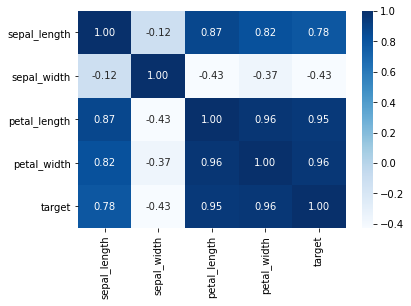

In [8]:
sns.heatmap(df.corr(), fmt='.2f', annot=True, cmap='Blues')
plt.show()

petal_width petal_length : 0.96

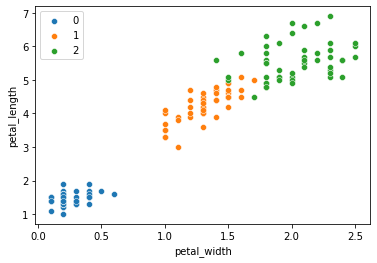

In [9]:
sns.scatterplot(data=df[df['target']==0], x="petal_width", y="petal_length", label="0")
sns.scatterplot(data=df[df['target']==1], x="petal_width", y="petal_length", label="1")
sns.scatterplot(data=df[df['target']==2], x="petal_width", y="petal_length", label="2")
plt.legend()
plt.show()

In [10]:
y = df['target']
X = df.drop(['target'], axis=1)

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, copy=True, random_state=1414)
pca_res = pca.fit_transform(X)
# type(pca_res)
pca_df = pd.DataFrame(pca_res, columns=['pc1','pc2'])
pca_df.shape

(150, 2)

In [12]:
pca_df['target'] = y
pca_df.head()

,pc1,pc2,target
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0


In [13]:
# 정답지 = df["target"]
y = df["target"]
# 문제지 = df.drop(["target"],axis=1)
X = df.drop(["target"],axis=1)

## PCA이후 산점도

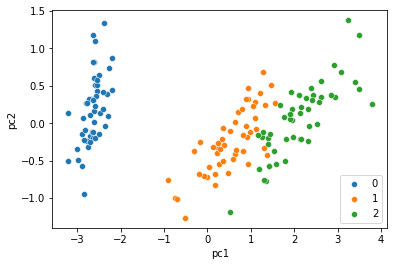

In [14]:
sns.scatterplot(data=pca_df[pca_df['target']==0], x="pc1", y="pc2", label="0")
sns.scatterplot(data=pca_df[pca_df['target']==1], x="pc1", y="pc2", label="1")
sns.scatterplot(data=pca_df[pca_df['target']==2], x="pc1", y="pc2", label="2")
plt.legend()
plt.show()

## 특정 피쳐 중심으로 다시한번 PCA

In [15]:
df = pd.read_csv("iris_lkh.csv")

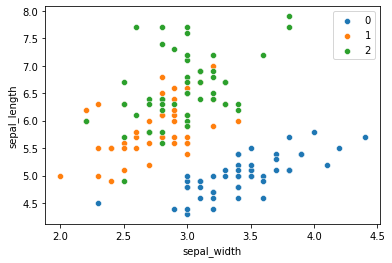

In [16]:
sns.scatterplot(data=df[df['target']==0], x="sepal_width", y="sepal_length", label="0")
sns.scatterplot(data=df[df['target']==1], x="sepal_width", y="sepal_length", label="1")
sns.scatterplot(data=df[df['target']==2], x="sepal_width", y="sepal_length", label="2")
plt.legend()
plt.show()

In [17]:
y = df['target']
X = df.drop(['target'], axis=1)

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, copy=True, random_state=1414)
pca_res = pca.fit_transform(X)
# type(pca_res)
pca_df = pd.DataFrame(pca_res, columns=['pc1','pc2'])
pca_df.shape

(150, 2)

In [19]:
pca_df['target'] = y
pca_df.head()

,pc1,pc2,target
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0


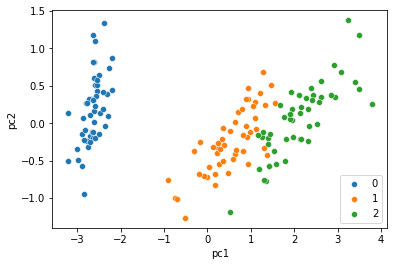

In [20]:
sns.scatterplot(data=pca_df[pca_df['target']==0], x="pc1", y="pc2", label="0")
sns.scatterplot(data=pca_df[pca_df['target']==1], x="pc1", y="pc2", label="1")
sns.scatterplot(data=pca_df[pca_df['target']==2], x="pc1", y="pc2", label="2")
plt.legend()
plt.show()

In [21]:
print(pca.explained_variance_ratio_)

[0.92461872 0.05306648]


# 2차 점수 확인 : PCA 후

In [22]:
y = pca_df['target']
X = pca_df.drop(['target'], axis=1)
# 문제지8, 문제지2 , 정답지8, 정답지2 = train_test_split(문제지, 정답지 , test_size=0.2,random_state=555,shuffle=True)
X_train,  X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1414)
model = RandomForestClassifier(random_state=1414)
# model.fit(문제지8, 정답지8)
model.fit(X_train,  y_train)
# 컴퓨터답안2 = model.predict(문제지2)
pred = model.predict(X_val)
my_eval(y_val, pred, avg='macro')

정확도 0.9333333333333333
정밀도(precision) 0.8888888888888888
재현률(recall) 0.9583333333333334
f1 0.9111111111111111
오차행렬
 [[10  0  0]
 [ 0 14  2]
 [ 0  0  4]]
정확도:0.9333 정밀도:0.8889 재현률:0.9583 f1:0.9111
